In [1]:
# ;export CUDA_VISIBLE_DEVICES=2

In [1]:
using CUDA, Flux
import JLD2
CUDA.device_reset!()
CUDA.device!(4)
Threads.nthreads()

16

In [2]:
include("../utils/train.jl")

In [23]:
rbm, J, m, hparams, rbmZ = initModel(nv=28*28, nh=500, batch_size=500, lr=1.5, t=10, gpu_usage = true, optType="Adam")
opt = initOptW(hparams, J);

In [3]:
# modelName = "Eigen-500-T1426"
modelName = "PCD-500-replica1"
rbm, J, m, hparams, opt = loadModel(modelName, gpu, idx=-1);
x, y = loadData(; hparams, dsName="MNIST01", numbers=collect(0:9), testset=true);
TS = Test(x,y)
dict = loadDict(modelName);

[ Info: /home/javier/Projects/RBM/Results/models/PCD-500-replica1
[ Info: Loadding model J_100.
[ Info: 10000


In [4]:
dev = gpu

gpu (generic function with 5 methods)

In [5]:
PATH = "/home/javier/Projects/RBM/Results/Figs/"

"/home/javier/Projects/RBM/Results/Figs/"

In [19]:
Models = Dict()
for i in 1:5
    # Models["$i"] = load(PATH * "Rdm-500-T100-BW-replica$i/thermoParams.jld")
    Models["$i"] = load(PATH * "CD-500-T1000-5-BW-replica$i-L/thermoParams.jld")
    # Models["$i"] = load(PATH * "PCD-500-replica$i/thermoParams.jld")
end

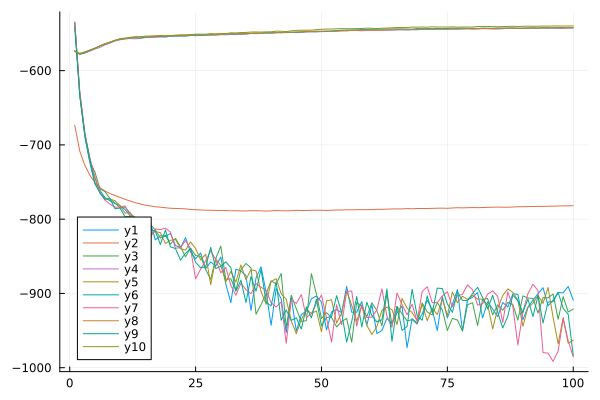

In [20]:
plot()
for i in 1:5
    plot!(Models["$i"]["srbm"])
    plot!(Models["$i"]["sdata"])
end
plot!()

In [8]:
# E0i
include("../therm.jl")

In [6]:
PATH = "/home/javier/Projects/RBM/Results/"
l=100
nv=28*28
nh=500
dev = gpu
β = 1.0
# modelName = "CD-500-T1000-5-BW-replica1-L"
modelName = "PCD-500-replica1"
rbm, J, m, hparams, opt = loadModel(modelName, gpu);
x_i, y_i = loadData(; hparams, dsName="MNIST01", numbers=collect(0:9), testset=true);

[ Info: /home/javier/Projects/RBM/Results/models/PCD-500-replica1
[ Info: Loadding model J_100.
[ Info: 10000


In [7]:
idx=100
J = load("$(PATH)/models/$(modelName)/J/J_$(idx).jld", "J")
J.w = gpu(J.w)
J.b = gpu(J.b)
J.a = gpu(J.a)
F = LinearAlgebra.svd(J.w, full=true);

In [9]:
v_val,h_val, x_val,y_val = data_val_samples(F)
# v,h = gibbs_sampling(v,h,J)
# umean, wmean, σ_2u, σ_2w, a0, b0, λ = compute_stats(v, h, J);

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 1.0 … 0.0 0.0; 0.0 0.0 … 1.0 0.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 0.0 … 1.0 1.0], Float32[-3.5242457 -3.5414052 … -2.4541454 -2.8603468; -0.5244049 -1.0519934 … -2.4616127 -1.6100851; … ; 0.04249204 -0.03759601 … -0.023802703 0.1315112; -0.035179056 -0.023272585 … 0.076679975 -0.025160402], Float32[3.8502383 4.1142936 … 5.2504697 4.43247; 0.9914657 0.41232228 … -1.759487 -0.5187418; … ; -0.08676918 -0.14907159 … 0.081129245 0.1308131; -0.14538947 0.30832654 … 0.07329101 0.37845677])

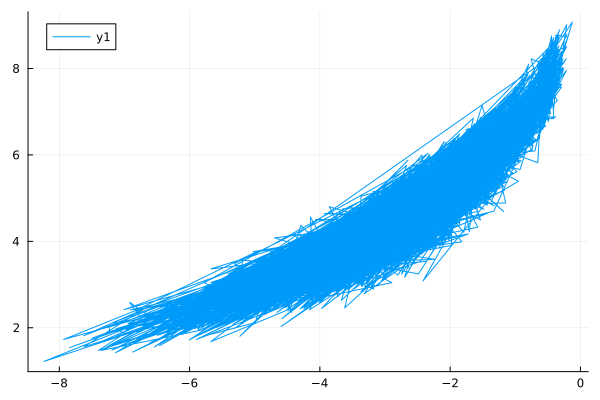

In [11]:
plot(x_val[1,:], y_val[1,:])

In [31]:
z = cat(x_val[1:500,:], y_val, dims=1);

In [32]:
Cov = cov(z');
C = cholesky(Hermitian(Cov));

In [50]:
nsamples = 10000
z_samples = reshape(mean(z,dims=2),:) .+ C.L * randn(size(z,1),nsamples);
x_samples = z_samples[1:500,:]
y_samples = z_samples[501:1000,:];

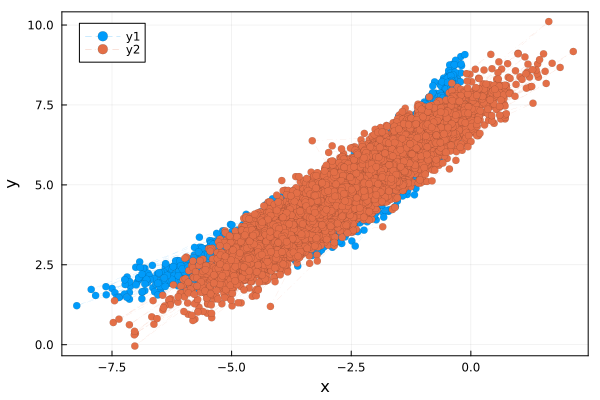

In [54]:
plot(x_val[1,:], y_val[1,:], s=:auto, markershapes = :circle, lw=0.0, markerstrokewidth=0.1, frame=:box)
plot!(x_samples[1,:], y_samples[1,:], s=:auto, markershapes = :circle, lw=0.0, markerstrokewidth=0.1, frame=:box, xlabel="x", ylabel="y")


In [55]:
Cov

1000×1000 Matrix{Float32}:
  1.50869     0.0399124   -0.287268     …  -0.0164797     0.0156355
  0.0399124   1.27532     -0.0781773        0.00813431   -0.00819453
 -0.287268   -0.0781773    0.659741         0.00164805    0.00306401
 -0.138972   -0.0173576    0.452499        -0.00227659    0.00157299
  0.32949    -0.00116828  -0.116497        -0.0146195     0.00626524
  0.0558695   0.175031    -0.151258     …   0.0127167    -0.00325755
  0.287708    0.0410769   -0.121517        -0.00736634    0.00508886
  0.260684    0.0681903    0.133487         0.0044492     0.00219805
  0.42256    -0.152668     0.104534        -0.0131887     0.0146634
  0.482378   -0.175332     0.043243        -0.0128549     0.00993898
  0.13751     0.243012     0.028701     …   0.00659941    0.00671033
  0.261978   -0.2607       0.126671        -0.0306146     0.0122584
  0.585252   -0.115835    -0.126722        -0.0134687     0.0038379
  ⋮                                     ⋱                
 -0.0034139  -0.016196

In [66]:
# ((z .- reshape(mean(z, dims=2),:)) * (z .- reshape(mean(z, dims=2),:))')/size(z,2)
Δz = z .- reshape(mean(z, dims=2),:);

In [67]:
Δz

1000×10000 Matrix{Float32}:
 -0.956325   -0.973484     -0.524199   -3.74756    …   0.113775   -0.292426
  0.243771   -0.283818      0.0230553  -1.25884       -1.69344    -0.84191
  0.779849    0.523448     -0.105444    1.91861        0.587336    0.142941
  0.157018   -0.436058     -0.952152    0.923514      -0.806836   -0.141955
 -0.389769   -0.000532866  -1.45712    -2.08504       -0.738715   -1.65876
 -0.85106     0.330141     -0.579493    0.829446   …   1.10155     0.750602
 -1.01638    -0.327481      0.659891   -1.63528       -0.21355    -0.30814
  1.0339     -3.30261      -0.386726   -1.43001        0.667393    1.49348
 -0.681857   -1.25632      -1.16312     0.218102       0.659669   -0.43921
 -1.31915    -1.53597      -0.814477   -1.14574        0.654476   -0.226611
 -0.69642     0.154229     -0.099408   -0.840968   …   0.491926   -0.383635
 -0.178821   -0.596157     -0.924481   -0.406847       0.653628   -0.306682
 -0.946877   -2.20621      -1.64379    -2.09928       -0.337818  

In [69]:
using Cumulants

In [ ]:
moment(z, 2)